## Comparitive Graphs for 2-11 Qubits

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob # For timestamps in files
import re # For plot name stuff 
import time 

Figure saved to /Users/administrator/Downloads/5_qubit_device_simulator/2-5_qubits_to_convergence/ZNE_summary_5qubit_Wed_Apr_30_13:47:17_2025.png


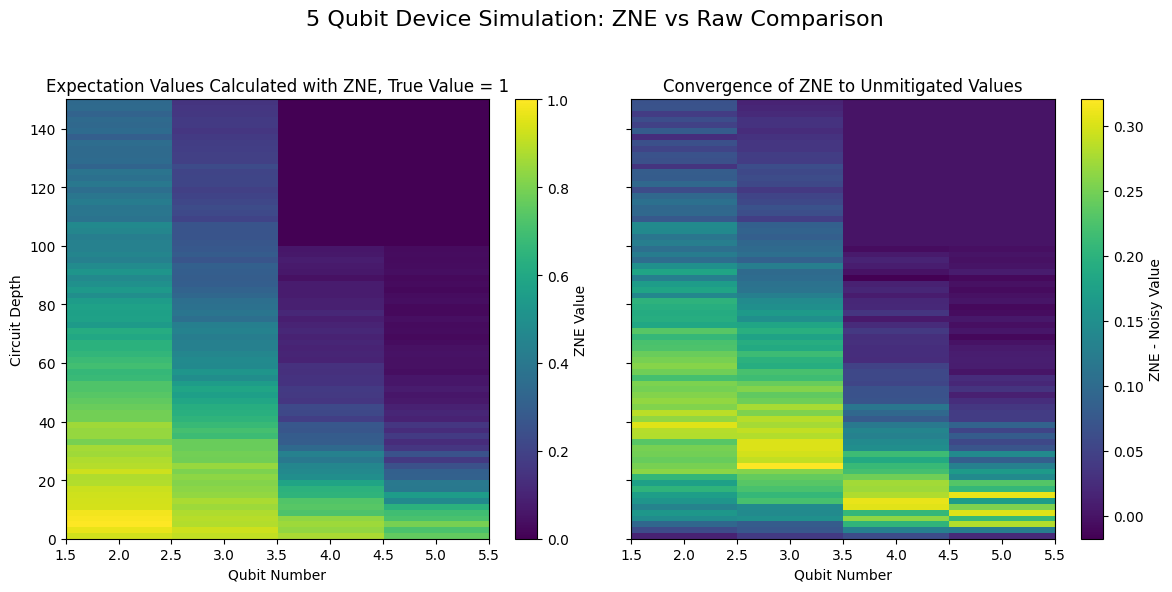

In [3]:
base_dir = "/Users/administrator/Downloads/5_qubit_device_simulator/2-5_qubits_to_convergence" 

subdirs = [
    os.path.join(base_dir, d)
    for d in os.listdir(base_dir)
    if os.path.isdir(os.path.join(base_dir, d))
]
subdirs = sorted(subdirs)[:4]  # Choose first 4 folders so plotting is in order

qubit_numbers = []
zne_matrix = []
zne_minus_noisy_matrix = []

max_depth_points = 75  # (0 to 150 in steps of 2) 

for subdir in subdirs:
    # Figuring out how many qubits were simulated from the folder name
    folder_name = os.path.basename(subdir)
    match = re.search(r"nqubits_(\d+)", folder_name)
    if not match:
        continue  # Skip if pattern not found
    qubit_num = int(match.group(1))
    qubit_numbers.append(qubit_num)

    # Load only useful data, skipping std, true values are always = 1
    zne_values = np.loadtxt(glob(os.path.join(subdir, "zne_values" + "*.txt"))[0])
    noisy_values = np.loadtxt(glob(os.path.join(subdir, "noisy_values" + "*.txt"))[0])

    avg_zne = np.average(zne_values, axis=1)
    avg_noisy = np.average(noisy_values, axis=1)
    zne_minus_noisy = avg_zne - avg_noisy

    # Pad with zeros to length 75
    padded_zne = np.pad(avg_zne, (0, max_depth_points - len(avg_zne)), constant_values=0.0)
    padded_diff = np.pad(zne_minus_noisy, (0, max_depth_points - len(zne_minus_noisy)), constant_values=0.0)

    zne_matrix.append(padded_zne)
    zne_minus_noisy_matrix.append(padded_diff)

# Convert lists to arrays (shape: depth × qubit number)
zne_matrix = np.array(zne_matrix).T
zne_minus_noisy_matrix = np.array(zne_minus_noisy_matrix).T

# Sort qubit numbers and corresponding columns
sorted_indices = np.argsort(qubit_numbers)
qubit_numbers = [qubit_numbers[i] for i in sorted_indices]
zne_matrix = zne_matrix[:, sorted_indices]
zne_minus_noisy_matrix = zne_minus_noisy_matrix[:, sorted_indices]

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

depths = np.arange(0, 151, 2)

im0 = axs[0].imshow(zne_matrix, aspect='auto', origin='lower', extent=[min(qubit_numbers)-0.5, max(qubit_numbers)+0.5, 0, 150])
axs[0].set_title("Expectation Values Calculated with ZNE, True Value = 1")
axs[0].set_xlabel("Qubit Number")
axs[0].set_ylabel("Circuit Depth")
fig.colorbar(im0, ax=axs[0], label="ZNE Value")

im1 = axs[1].imshow(zne_minus_noisy_matrix, aspect='auto', origin='lower', extent=[min(qubit_numbers)-0.5, max(qubit_numbers)+0.5, 0, 150])
axs[1].set_title("Convergence of ZNE to Unmitigated Values")
axs[1].set_xlabel("Qubit Number")
fig.colorbar(im1, ax=axs[1], label="ZNE - Noisy Value")

fig.suptitle("5 Qubit Device Simulation: ZNE vs Raw Comparison", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save
time_key = "_" + "_".join(time.asctime().split())
save_path = os.path.join(base_dir, f"ZNE_summary_5qubit{time_key}.png")
plt.savefig(save_path)
print(f"Figure saved to {save_path}")


## Up to 11 qubits

Figure saved to /Users/administrator/Downloads/up_to_11_sim/ZNE_summary_5qubit_Wed_Apr_30_15:26:07_2025.png


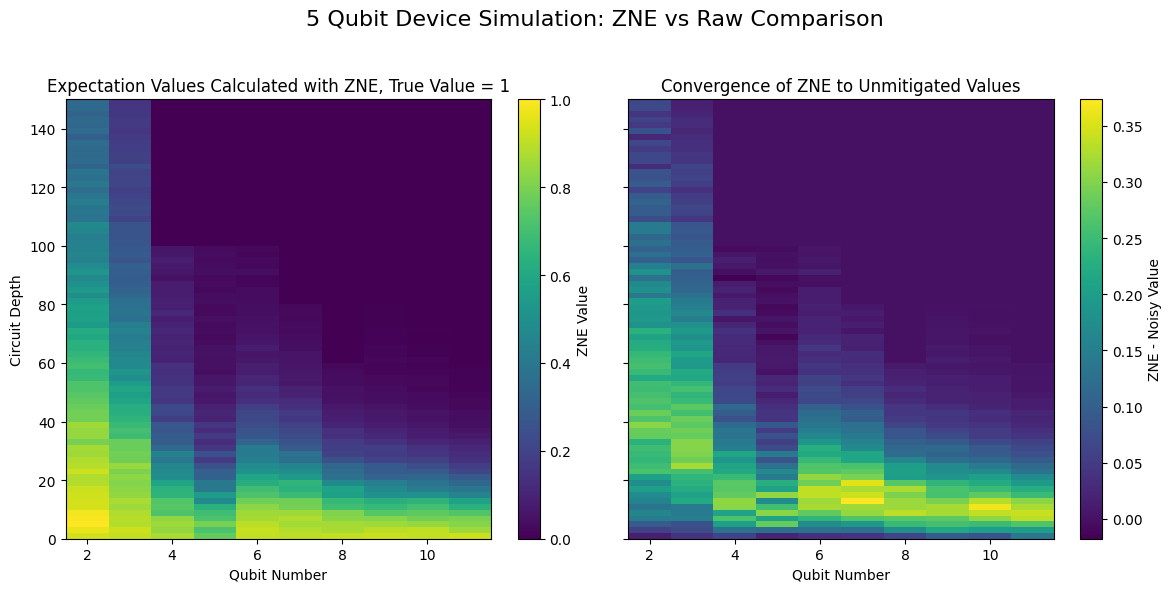

In [ ]:
base_dir = "/Users/administrator/Downloads/up_to_11_sim" 

subdirs = [
    os.path.join(base_dir, d)
    for d in os.listdir(base_dir)
    if os.path.isdir(os.path.join(base_dir, d))
]
subdirs = sorted(subdirs)[:10]  # Choose first 10 folders so plotting is in order, other files are images

qubit_numbers = []
zne_matrix = []
zne_minus_noisy_matrix = []

max_depth_points = 75  # (0 to 150 in steps of 2) 

for subdir in subdirs:
    # Figuring out how many qubits were simulated from the folder name
    folder_name = os.path.basename(subdir)
    match = re.search(r"nqubits_(\d+)", folder_name)
    if not match:
        continue  # Skip if pattern not found
    qubit_num = int(match.group(1))
    qubit_numbers.append(qubit_num)

    # Load only useful data, skipping std, true values are always = 1
    zne_values = np.loadtxt(glob(os.path.join(subdir, "zne_values" + "*.txt"))[0])
    noisy_values = np.loadtxt(glob(os.path.join(subdir, "noisy_values" + "*.txt"))[0])

    avg_zne = np.average(zne_values, axis=1)
    avg_noisy = np.average(noisy_values, axis=1)
    zne_minus_noisy = avg_zne - avg_noisy

    # Pad with zeros to length 75
    padded_zne = np.pad(avg_zne, (0, max_depth_points - len(avg_zne)), constant_values=0.0)
    padded_diff = np.pad(zne_minus_noisy, (0, max_depth_points - len(zne_minus_noisy)), constant_values=0.0)

    zne_matrix.append(padded_zne)
    zne_minus_noisy_matrix.append(padded_diff)

# Convert lists to arrays (shape: depth × qubit number)
zne_matrix = np.array(zne_matrix).T
zne_minus_noisy_matrix = np.array(zne_minus_noisy_matrix).T

# Turn to array for binning purposes
qubit_numbers = np.array(qubit_numbers)
x_positions = np.arange(len(qubit_numbers))

# Sort qubit numbers and corresponding columns
sorted_indices = np.argsort(qubit_numbers)
qubit_numbers = [qubit_numbers[i] for i in sorted_indices]
zne_matrix = zne_matrix[:, sorted_indices]
zne_minus_noisy_matrix = zne_minus_noisy_matrix[:, sorted_indices]

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

depths = np.arange(0, 151, 2)

im0 = axs[0].imshow(zne_matrix, aspect='auto', origin='lower', extent=[min(qubit_numbers)-0.5, max(qubit_numbers)+0.5, 0, 150])
axs[0].set_title("Expectation Values Calculated with ZNE, True Value = 1")
axs[0].set_xlabel("Qubit Number")
axs[0].set_ylabel("Circuit Depth")
fig.colorbar(im0, ax=axs[0], label="ZNE Value")

im1 = axs[1].imshow(zne_minus_noisy_matrix, aspect='auto', origin='lower', extent=[min(qubit_numbers)-0.5, max(qubit_numbers)+0.5, 0, 150])
axs[1].set_title("Convergence of ZNE to Unmitigated Values")
axs[1].set_xlabel("Qubit Number")
fig.colorbar(im1, ax=axs[1], label="ZNE - Noisy Value")

fig.suptitle("5 Qubit Device Simulation: ZNE vs Raw Comparison", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save
time_key = "_" + "_".join(time.asctime().split())
save_path = os.path.join(base_dir, f"ZNE_summary_5qubit{time_key}.png")
plt.savefig(save_path)
print(f"Figure saved to {save_path}")
